In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/comprehensive_df.csv', index_col=0)

class_i


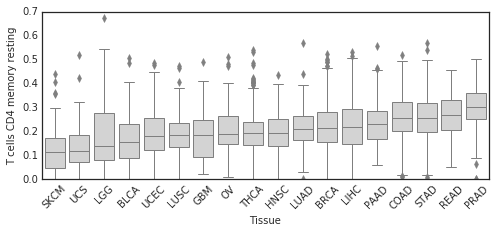

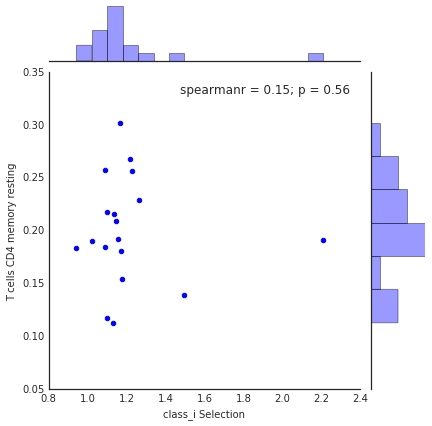

class_ii


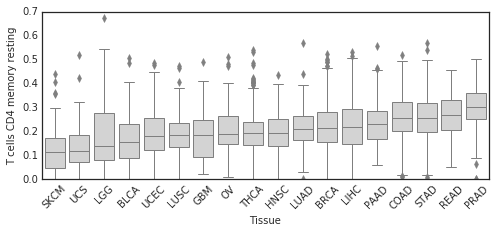

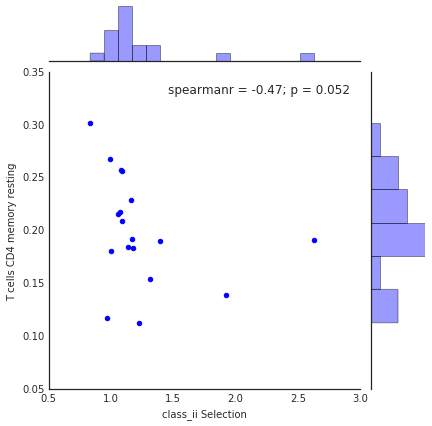

In [15]:
for c in ['class_i', 'class_ii']:
    print c
    selection = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/{0}/cancer.thresh_2.txt'.format(c))

    merged = pd.merge(df.groupby('Tissue').median()[['T cells CD4 memory resting']],
             selection[['OR']], left_index=True, right_index=True) 
    cell_type = 'T cells CD4 memory resting'
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='Tissue', y=cell_type, data=df[df.Tissue.isin(merged.index)],
               order=[x for x in df.groupby('Tissue').median().sort_values(cell_type).index if x in merged.index],
               color = 'lightgrey')
    plt.xticks(rotation=45)
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/infiltration/CD4_resting.boxplot.{0}.pdf'.format(c))
    plt.show()
    plt.clf()
    merged['{0} Selection'.format(c)] = merged['OR']
    sns.jointplot('{0} Selection'.format(c), 'T cells CD4 memory resting', data=merged, stat_func=sp.spearmanr)
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/infiltration/CD4_resting.correlation.{0}.pdf'.format(c))
    plt.show()
    plt.clf()